# TLL SAXS - Neofaunus version
*C. Pasquier and S. Hervø-Hansen, Division of Theoretical Chemistry, Lund University, 2017*


### System Requirements
This Jupyter Notebook was originally run on Ubuntu 14.04 with `Python 3.5.2`, `matplotlib`, `numpy` within the Anaconda environment.

## Import modules

In [1]:
from __future__ import division, unicode_literals, print_function
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np, pandas as pd
import os.path, os, sys, json
import math
from math import sqrt
plt.rcParams.update({'font.size': 18, 'figure.figsize': [12.0, 8.0]})
workdir=%pwd   #'/lunarc/nobackup/projects/snic2020-6-15/coralie2/neofaunus/mc'
print(workdir)

/lunarc/nobackup/projects/snic2020-6-15/coralie2/neofaunus/mc


In [15]:
%cd $workdir

def mkinput():
    mk = {
        "energy" : [
            {"nonbonded_coulomblj_EM":{"openmp":["g2g"], "cutoff_g2g":cut_g2g, 
                                    "coulomb":{"epsr":78.7, "type":"yukawa", "debyelength":debyelength, "cutoff":cut_i2i},
                                    "lennardjones":{"mixing":"LB", 
                                                    "custom":{
                                                        "BALA BALA" : { "sigma":hsigma, "eps":heps }, 
                                                        "BALA BILE" : { "sigma":hsigma, "eps":heps },
                                                        "BALA BLEU" : { "sigma":hsigma, "eps":heps },
                                                        "BALA BPRO" : { "sigma":hsigma, "eps":heps },
                                                        "BALA BPHE" : { "sigma":hsigma, "eps":heps },
                                                        "BALA BVAL" : { "sigma":hsigma, "eps":heps },
                                                        "BALA BTRP" : { "sigma":hsigma, "eps":heps },     
                                                        "BILE BILE" : { "sigma":hsigma, "eps":heps }, 
                                                        "BILE BLEU" : { "sigma":hsigma, "eps":heps },
                                                        "BILE BPRO" : { "sigma":hsigma, "eps":heps },
                                                        "BILE BPHE" : { "sigma":hsigma, "eps":heps },
                                                        "BILE BVAL" : { "sigma":hsigma, "eps":heps }, 
                                                        "BILE BTRP" : { "sigma":hsigma, "eps":heps },           
                                                        "BLEU BLEU" : { "sigma":hsigma, "eps":heps }, 
                                                        "BLEU BPRO" : { "sigma":hsigma, "eps":heps },
                                                        "BLEU BPHE" : { "sigma":hsigma, "eps":heps },
                                                        "BLEU BVAL" : { "sigma":hsigma, "eps":heps },
                                                        "BLEU BTRP" : { "sigma":hsigma, "eps":heps }, 
                                                        "BPHE BPHE" : { "sigma":hsigma, "eps":heps }, 
                                                        "BPHE BPRO" : { "sigma":hsigma, "eps":heps },
                                                        "BPHE BVAL" : { "sigma":hsigma, "eps":heps },
                                                        "BPHE BTRP" : { "sigma":hsigma, "eps":heps },       
                                                        "BPRO BPRO" : { "sigma":hsigma, "eps":heps }, 
                                                        "BPRO BVAL" : { "sigma":hsigma, "eps":heps },
                                                        "BPRO BTRP" : { "sigma":hsigma, "eps":heps },   
                                                        "BTRP BTRP" : { "sigma":hsigma, "eps":heps },
                                                        "BTRP BVAL" : { "sigma":hsigma, "eps":heps },       
                                                        "BVAL BVAL" : { "sigma":hsigma, "eps":heps }
                                                    }
                                                   }
                                    }
            }
        ],      
        "atomlist" : [
            {"H3PO4":  { "eps":epslj, "q":0, "r":2.0 }},
            {"H2PO4":  { "eps":epslj, "q":-1, "r":2.0 }},
            {"HPO4" :  { "eps":epslj, "q":-2, "r":2.0 }},
            {"PO4"  :  { "eps":epslj, "q":-3, "r":2.0 }},
            {"BPTI" :  { "eps":epslj, "q":7.3, "r":12.29 }},
            {"Na"   :  { "eps":epslj, "q": 1, "r":1.9, "mw":22.99 }},
            {"Cl"   :  { "eps":epslj, "q":-1, "r":1.7, "mw":35.45 }},
            {"I"    :  { "eps":epslj, "q":-1, "r":2.0, "mw":1 }},
            {"SCN"  :  { "eps":epslj, "q":-1, "r":2.0, "mw":1 }},
            {"ASP"  :  { "eps":epslj, "q":-1, "r":3.6, "mw":110 }},
            {"CTR"  :  { "eps":epslj, "q":-1, "r":2.0, "mw":16 }},
            {"GLU"  :  { "eps":epslj, "q":-1, "r":3.8, "mw":122 }},
            {"HIS"  :  { "eps":epslj, "q":0.5,  "r":3.9, "mw":130 }},
            {"SHIS"  :  { "eps":epslj, "q":0.5,  "r":3.9, "mw":130 }},
            {"LSHIS"  :  { "eps":epslj, "q":0,  "r":3.9, "mw":130 }},
            {"NTR"  :  { "eps":epslj, "q":1,  "r":2.0, "mw":14 }},
            {"SNTR"  :  { "eps":epslj, "q":1,  "r":2.0, "mw":14 }},
            {"LSNTR"  :  { "eps":epslj, "q":0,  "r":2.0, "mw":14 }},
            {"TYR"  :  { "eps":epslj, "q":0, "r":4.1, "mw":154 }},
            {"LYS"  :  { "eps":epslj, "q":1,  "r":3.7, "mw":116 }},
            {"SLYS" :  { "eps":epslj, "q":1,  "r":3.7, "mw":116 }},
            {"LSLYS" :  { "eps":epslj, "q":0,  "r":3.7, "mw":116 }},
            {"CYS"  :  { "eps":epslj, "q":-1, "r":3.6, "mw":103 }},
            {"CYT"  :  { "eps":epslj, "q":0, "r":3.6, "mw":103 }},
            {"ARG"  :  { "eps":epslj, "q":1,  "r":4.0, "mw":144 }},
            {"SARG" :  { "eps":epslj, "q":1,  "r":4.0, "mw":144 }},
            {"LSARG" :  { "eps":epslj, "q":0,  "r":4.0, "mw":144 }},
            {"ALA"  :  { "eps":epslj, "q":0,  "r":3.1, "mw":66 }},
            {"BALA" :  { "eps":epslj, "q":0,  "r":3.1, "mw":66 }},
            {"LBALA" :  { "eps":epslj, "q":-1,  "r":3.1, "mw":66 }},
            {"ILE"  :  { "eps":epslj, "q":0,  "r":3.6, "mw":102 }},
            {"BILE" :  { "eps":epslj, "q":0,  "r":3.6, "mw":102 }},
            {"LBILE" :  { "eps":epslj, "q":-1,  "r":3.6, "mw":102 }},
            {"LEU"  :  { "eps":epslj, "q":0,  "r":3.6, "mw":102 }},
            {"BLEU" :  { "eps":epslj, "q":0,  "r":3.6, "mw":102 }},
            {"LBLEU" :  { "eps":epslj, "q":-1,  "r":3.6, "mw":102 }},
            {"MET"  :  { "eps":epslj, "q":0,  "r":3.8, "mw":122 }},
            {"PHE"  :  { "eps":epslj, "q":0,  "r":3.9, "mw":138 }},
            {"BPHE" :  { "eps":epslj, "q":0,  "r":3.9, "mw":138 }},
            {"LBPHE" :  { "eps":epslj, "q":-1,  "r":3.9, "mw":138 }},
            {"PRO"  :  { "eps":epslj, "q":0,  "r":3.4, "mw":90 }},
            {"BPRO" :  { "eps":epslj, "q":0,  "r":3.4, "mw":90 }},
            {"LBPRO" :  { "eps":epslj, "q":-1,  "r":3.4, "mw":90 }},
            {"TRP"  :  { "eps":epslj, "q":0,  "r":4.3, "mw":176 }},
            {"BTRP" :  { "eps":epslj, "q":0,  "r":4.3, "mw":176 }},
            {"LBTRP" :  { "eps":epslj, "q":-1,  "r":4.3, "mw":176 }},
            {"VAL"  :  { "eps":epslj, "q":0,  "r":3.4, "mw":90 }},
            {"BVAL" :  { "eps":epslj, "q":0,  "r":3.4, "mw":90 }},
            {"LBVAL" :  { "eps":epslj, "q":-1,  "r":3.4, "mw":90 }},
            {"SER"  :  { "eps":epslj, "q":0,  "r":3.3, "mw":82 }},
            {"THR"  :  { "eps":epslj, "q":0,  "r":3.5, "mw":94 }},
            {"ASN"  :  { "eps":epslj, "q":0,  "r":3.6, "mw":108 }},
            {"GLN"  :  { "eps":epslj, "q":0,  "r":3.8, "mw":120 }},
            {"GLY"  :  { "eps":epslj, "q":0,  "r":2.9, "mw":54 }},
            {"CM"   :  { "eps":epslj, "q":0,  "r":0.01, "mw":10000 }},
            {"SP"   :  { "eps":epslj, "q":3,  "r":1.00, "mw":10000 }},
            {"MAN"  :  { "eps":epsmn, "q":0,  "r":2.9, "mw":108 }},
            {"MAP"  :  { "eps":epsmn, "q":0,  "r":5.8, "mw":108 }},
            {"MAQ"  :  { "eps":epsmn, "q":0,  "r":8.7, "mw":108 }},
            {"MAR"  :  { "eps":epsmn, "q":0,  "r":20.0, "mw":108 }}
        ],  
        "moleculelist": [
            {"protein": { "rigid":True, "keepcharges":True, "structure":macromolecule }}
        ],
        "insertmolecules": [
            {"protein" : { "N":Np }} 
        ],
        "moves":[
            {"moltransrot":{"molecule":"protein", "dp":dp, "dprot":3, "repeat":"N"}},
            {"moltransrot":{"molecule":"protein", "dp":dp2, "dprot":1, "repeat":"N"}},
            {"cluster":{"molecules":["protein"], "dp":dp, "dprot":3, "threshold":2*28+6}}
        ],
        "analysis":[
            {"sanity":{"nstep":100}},
            {"systemenergy":{"file":"energy.dat", "nstep":100}},   
            {"molrdf":{"file":"rdf.dat", "nstep":100, "dr":0.5, "name1":"protein", "name2":"protein"}},
            {"scatter":{"dq":0.001, "file":"debye_n2.dat", "molecules":["protein"], "nstep":20, 
                        "com":True, "scheme":"explicit", "pmax":200}},
            {"xtcfile":{"file":"traj.xtc", "nstep":1000}},
            {"savestate":{"file":"confout.pqr"}},
            {"savestate":{"file":"state.json"}}      
        ],
        "temperature":298.15,
        "random":{"seed":"default"},
        "geometry":{"type":"cuboid", "length":[boxlen, boxlen, boxlen]},
        "mcloop":{"macro":10, "micro":micro}
    }
    with open('tll.json', 'w+') as f:
        f.write(json.dumps(mk, indent=4))
    
     
Cs = 0.105 
Np = 325
N_A = 6.02214129*1e+23
pH = 8.0
debyelength = 3.04/Cs**0.5

cut_g2g=5*debyelength+2*28
cut_i2i=5*debyelength

hsigma = 7.0   

# Conversion of epsilons from kT to kJ/mol
def epskt():
    global heps, epslj, epsmn
    kTtokJmol = (1.3806*10**-23)*(6.022*10**23)*298.15/1000
    heps = epsHH_kT*kTtokJmol
    epslj = eps_kT*kTtokJmol
    epsmn = 0.005*kTtokJmol

# Box dimensions
def setboxlen():
    global boxlen
    boxlen = (((Np/N_A)*(Mw/Cp))**(1/3))*1e9              
               
# Which form?
def seriesdef():
    global conc_range, Mw, macromolecule
    if series=="series1_T2":
        conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
        Mw = 31598.27
        if structure=="closed":
            macromolecule = "../s1_1du4_closed_t2.aam"
        elif structure=="open":
            macromolecule = "../s1_1ein_open_t2.aam"

    if series=="series1_T3":
        conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
        Mw = 31598.27
        if structure=="closed":
            macromolecule = "../s1_1du4_closed_t3.aam"
        elif structure=="open":
            macromolecule = "../s1_1ein_open_t3.aam"

    if series=="series1_R20":
        conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
        Mw = 31598.27
        if structure=="closed":
            macromolecule = "../1du4_R20.aam"
        elif structure=="open":
            macromolecule = "../1ein_R20.aam"

    if series=="series2":
        conc_range = [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06] 
        Mw = 29609.61
        if structure=="closed":
            macromolecule = "../1du4_closed.aam"
        elif structure=="open":
            macromolecule = "../1ein_open.aam"  

def setdp():
    global dp, dp2, mod
    dp = 100 + mod
    dp2 = 10 + mod
                       
            
# Writes the submit.sh file                                 
def submit_mkinput():   
    global run_arg1, run_arg2
    if runprod==True:
        run_arg1 = '#'
        run_arg2 = ''
    elif runprod==False:
        run_arg1 = ''
        run_arg2 = '#'
    else:
        print('run only takes the argument "prod" or "equil"')
        
    d = """#!/bin/bash
#SBATCH -A snic2019-3-188
#SBATCH -N 1
#SBATCH --tasks-per-node=4
#SBATCH -t 168:00:00

{equil}OMP_NUM_THREADS=4 | time ../../faunus/faunus -i tll.json -o tll.out --nobar 
{prod}OMP_NUM_THREADS=4 | time ../../faunus/faunus -i tll.json --state state.json -o tll.out --nobar

"""
    with open('submit.sh', 'w+') as f:
        f.write(d.format(equil=run_arg1, prod=run_arg2))
        f.close()
        
#{"scatter":{"dq":0.001, "file":"debye.dat", "molecules":["protein"], "nstep":20, "qmax":0.5,"qmin":0.005, "com":True}},           
    
# Conditions
series = "series2"
structure = "open"
runprod = True

# Number of loops for equilibration and production runs
micro_eq = 10000        # 10.000=15h
micro_prod = 10000      # Id.
 
copystate = True

for epsHH_kT in [0.485]: 
    for eps_kT in [0.005]:
        for mod in [0,1,2]:
            epskt()
            seriesdef()
            setdp()
            for Cp in conc_range:
                %cd -q $workdir
                setboxlen()
                submit_mkinput()
                pfx = str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)+'-dp'+str(mod)
                pfx2 = str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)
                if not os.path.isdir(pfx):
                    %mkdir -p $pfx
                    
                %cd $workdir/data
                %cd $pfx2
                %cp state.json $workdir/$pfx
                
                %cd $workdir/$pfx
                
                if (runprod==False):
                    print ("\nEquilibration run")
                    try:
                        os.remove('state')
                        print ("State file deleted")
                    except: pass
                    micro=micro_eq
                    mkinput()
                    !sbatch -J $pfx -o eq -e stderr ../submit.sh   
                    %cd $workdir  
                if (runprod==True):
                    print ("\nProduction run")
                    #%cp debye.dat debye_eq.dat
                    #%cp energy.dat energy_eq.dat
                    micro=micro_prod
                    mkinput()
                    !sbatch -J $pfx -o out -e stderr ../submit.sh
                    %cd $workdir
            

/lunarc/nobackup/users/coralie/neofaunus/mc
/lunarc/nobackup/users/coralie/neofaunus/mc/data
/lunarc/nobackup/users/coralie/neofaunus/mc/data/series2-open-h0.485-e0.005-C0.34
/lunarc/nobackup/users/coralie/neofaunus/mc/series2-open-h0.485-e0.005-C0.34-dp0

Production run
Submitted batch job 3393282
/lunarc/nobackup/users/coralie/neofaunus/mc
/lunarc/nobackup/users/coralie/neofaunus/mc/data
/lunarc/nobackup/users/coralie/neofaunus/mc/data/series2-open-h0.485-e0.005-C0.67
/lunarc/nobackup/users/coralie/neofaunus/mc/series2-open-h0.485-e0.005-C0.67-dp0

Production run
Submitted batch job 3393283
/lunarc/nobackup/users/coralie/neofaunus/mc
/lunarc/nobackup/users/coralie/neofaunus/mc/data
/lunarc/nobackup/users/coralie/neofaunus/mc/data/series2-open-h0.485-e0.005-C1.24
/lunarc/nobackup/users/coralie/neofaunus/mc/series2-open-h0.485-e0.005-C1.24-dp0

Production run
Submitted batch job 3393284
/lunarc/nobackup/users/coralie/neofaunus/mc
/lunarc/nobackup/users/coralie/neofaunus/mc/data
/lunarc

## Energy checking

/lunarc/nobackup/projects/snic2020-6-15/coralie2/neofaunus/mc/series2-open-h0.355-e0.05-C0.34-dp0
/lunarc/nobackup/projects/snic2020-6-15/coralie2/neofaunus/mc/series2-open-h0.355-e0.05-C0.67-dp0
/lunarc/nobackup/projects/snic2020-6-15/coralie2/neofaunus/mc/series2-open-h0.355-e0.05-C1.24-dp0
/lunarc/nobackup/projects/snic2020-6-15/coralie2/neofaunus/mc/series2-open-h0.355-e0.05-C2.47-dp0
/lunarc/nobackup/projects/snic2020-6-15/coralie2/neofaunus/mc/series2-open-h0.355-e0.05-C3.07-dp0
/lunarc/nobackup/projects/snic2020-6-15/coralie2/neofaunus/mc/series2-open-h0.355-e0.05-C4.2-dp0
/lunarc/nobackup/projects/snic2020-6-15/coralie2/neofaunus/mc/series2-open-h0.355-e0.05-C5.6-dp0
/lunarc/nobackup/projects/snic2020-6-15/coralie2/neofaunus/mc/series2-open-h0.355-e0.05-C6.06-dp0


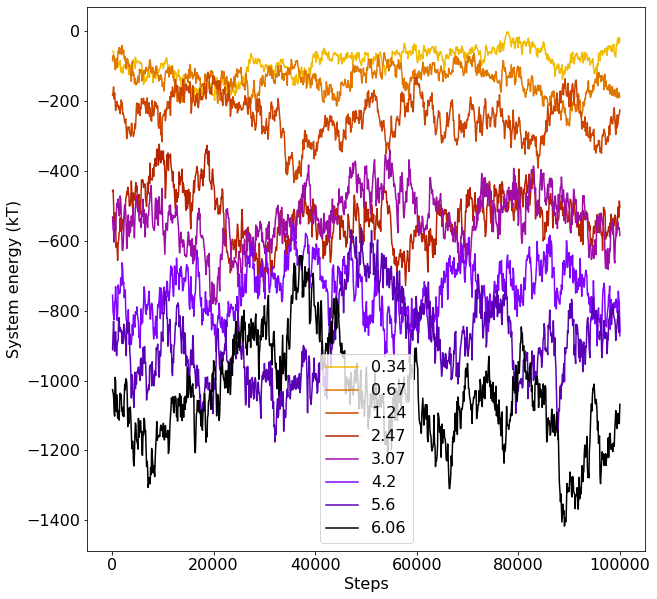

In [4]:
%cd -q $workdir
from cycler import cycler
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 10.0]})
colormap = plt.cm.gnuplot_r
plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))

series = "series2"
structure = "open"


if series=="series1_T2":
    conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
    Mw = 31598.27
    if structure=="closed":
        macromolecule = "../s1_1du4_closed_t2.aam"
    elif structure=="open":
        macromolecule = "../s1_1ein_open_t2.aam"

if series=="series1_T3":
    conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
    Mw = 31598.27
    if structure=="closed":
        macromolecule = "../s1_1du4_closed_t3.aam"
    elif structure=="open":
        macromolecule = "../s1_1ein_open_t3.aam"

if series=="series1_R20":
    conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
    Mw = 31598.27
    if structure=="closed":
        macromolecule = "../1du4_R20.aam"

if series=="series2":
    conc_range = [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06] 
    Mw = 29609.61
    if structure=="closed":
        macromolecule = "../1du4_closed.aam"
    elif structure=="open":
        macromolecule = "../1ein_open.aam"    

# 0.005 : 0.825 pr closed, 0.485 pr open
# 0.05 : 0.61 pr closed, 0.355 pr open

for epsHH_kT in [0.355]: 
    for eps_kT in [0.05]:
        for mod in [0]:
            for Cp in conc_range:
                pfx = str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)+'-dp'+str(mod)
                %cd $pfx
                t,e = np.loadtxt("energy.dat",usecols=(0,1),unpack=True)
                plt.plot(t,e,label=str(Cp))
                plt.xlabel("Steps")
                plt.ylabel("System energy (kT)")
                plt.legend()

                %cd -q '..'
            
#plt.savefig('energy-'+str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'.pdf', bbox_inches='tight')        
            
%cd -q $workdir

## S(q)

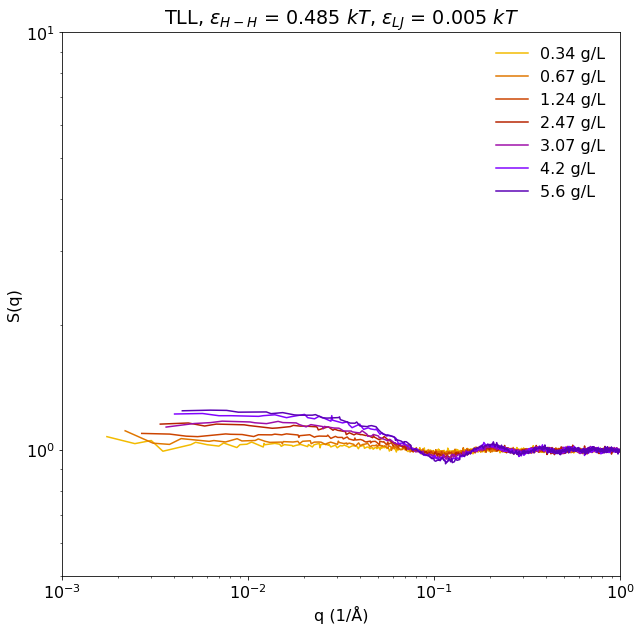

In [49]:
%cd -q $workdir
from cycler import cycler
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 10.0]})
colormap = plt.cm.gnuplot_r
plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))


series = "series2"
structure = "open"


if series=="series1_T2":
    conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
    Mw = 31598.27
    if structure=="closed":
        macromolecule = "../s1_1du4_closed_t2.aam"
    elif structure=="open":
        macromolecule = "../s1_1ein_open_t2.aam"

if series=="series1_T3":
    conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
    Mw = 31598.27
    if structure=="closed":
        macromolecule = "../s1_1du4_closed_t3.aam"
    elif structure=="open":
        macromolecule = "../s1_1ein_open_t3.aam"

if series=="series1_R20":
    conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
    Mw = 31598.27
    if structure=="closed":
        macromolecule = "../1du4_R20.aam"
    title = "TLLm"

if series=="series2":
    conc_range = [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6] #, 6.06] 
    Mw = 29609.61
    if structure=="closed":
        macromolecule = "../1du4_closed.aam"
    elif structure=="open":
        macromolecule = "../1ein_open.aam"    
    title = "TLL"

%cd -q $workdir
for epsHH_kT in [0.485]: 
    for eps_kT in [0.005]:
        for mod in [0]:
            #plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))
            for Cp in conc_range:
                pfx = str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)+'-dp'+str(mod)
                %cd -q $pfx
                q,s = np.loadtxt("debye_n2.dat",usecols=(0,1),unpack=True)
                plt.plot(q,s,ls='-',label=str(Cp)+" g/L")
                #plt.xlim(0.005,0.5)
                #plt.ylim(0.5, 3.0)
                plt.xlabel("q (1/Å)")
                plt.ylabel("S(q)")
                #plt.ylim(0.6,1.5)
                plt.ylim(0.5, 10)
                plt.xlim(0.001,1.0)
                plt.yscale('log')
                plt.xscale('log')
                plt.legend(frameon=False)
                plt.title(str(title)+", "+r"$\varepsilon_{H-H}$ = "+str(epsHH_kT)+" $kT$, "+r"$\varepsilon_{LJ}$ = "+str(eps_kT)+" $kT$")
                %cd -q '..'
                
plt.gca().set_prop_cycle(None)
%cd -q $workdir

oldsq=False

if oldsq==True:
    for epsHH_kT in [0.61]: 
        for eps_kT in [0.05]:
            for mod in [0]:
                plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))
                for Cp in conc_range:
                    pfx2 = './data_130220/'+str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)
                    %cd -q $pfx2
                    q1,s1 = np.loadtxt('debye.dat',usecols=(0,1),unpack=True)
                    plt.plot(q1,s1,ls='--')
                    #plt.xlim(0.005,0.5)
                    #plt.ylim(0.5, 3.0)
                    #plt.xlabel("q (1/Å)")
                    plt.ylabel("S(q)")
                    #plt.ylim(0.6,1.5)
                    plt.ylim(0.5, 10)
                    plt.xlim(0.001,1.0)
                    plt.yscale('log')
                    plt.xscale('log')
                    plt.legend(frameon=False)
                    plt.title(str(title)+", "+r"$\varepsilon_{H-H}$ = "+str(epsHH_kT)+" $kT$, "+r"$\varepsilon_{LJ}$ = "+str(eps_kT)+" $kT$")
                    #plt.gca().set_prop_cycle(None)
                    %cd -q '..'

#plt.savefig('sq-'+str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-mod'+str(mod)+'2.pdf', bbox_inches='tight') 

%cd -q $workdir

## g(r)

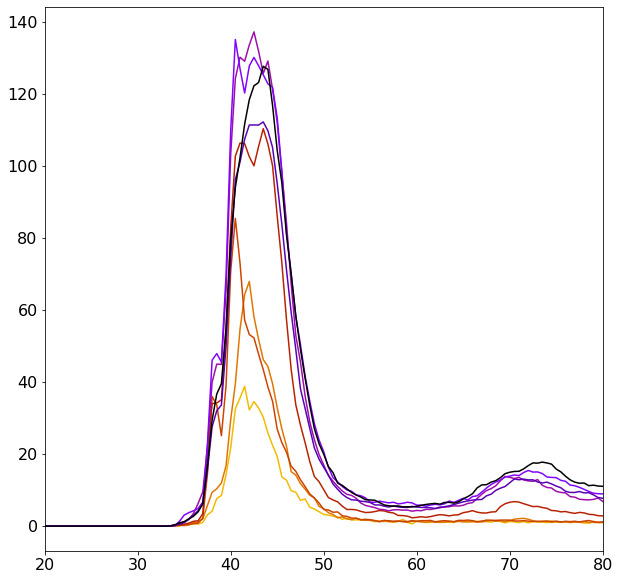

In [20]:
%cd -q $workdir
from cycler import cycler
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 10.0]})
colormap = plt.cm.gnuplot_r
plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))


series = "series2"
structure = "closed"


if series=="series1_T2":
    conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
    Mw = 31598.27
    if structure=="closed":
        macromolecule = "../s1_1du4_closed_t2.aam"
    elif structure=="open":
        macromolecule = "../s1_1ein_open_t2.aam"

if series=="series1_T3":
    conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
    Mw = 31598.27
    if structure=="closed":
        macromolecule = "../s1_1du4_closed_t3.aam"
    elif structure=="open":
        macromolecule = "../s1_1ein_open_t3.aam"

if series=="series1_R20":
    conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
    Mw = 31598.27
    if structure=="closed":
        macromolecule = "../1du4_R20.aam"

if series=="series2":
    conc_range = [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6, 6.06] 
    Mw = 29609.61
    if structure=="closed":
        macromolecule = "../1du4_closed.aam"
    elif structure=="open":
        macromolecule = "../1ein_open.aam"    



for epsHH_kT in [0.825]: 
    for eps_kT in [0.05]:
        for Cp in conc_range:
            pfx = str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)
            %cd -q $pfx
            r,g = np.loadtxt("rdf.dat",usecols=(0,1),unpack=True)
            plt.plot(r,g)
            plt.xlim(20,80)
                        
            %cd -q '..'
        
#plt.savefig('gr-'+str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'.pdf', bbox_inches='tight') 
            
%cd -q $workdir

## Regression for S(0)

0.34 r2= 0.2613569857999202
0.67 r2= 0.41996621326207295
1.24 r2= 0.7568233884902936
2.47 r2= 0.8679446560961103
3.07 r2= 0.8109896352879301
4.2 r2= 0.8314208847960018
5.6 r2= 0.9385022496049371


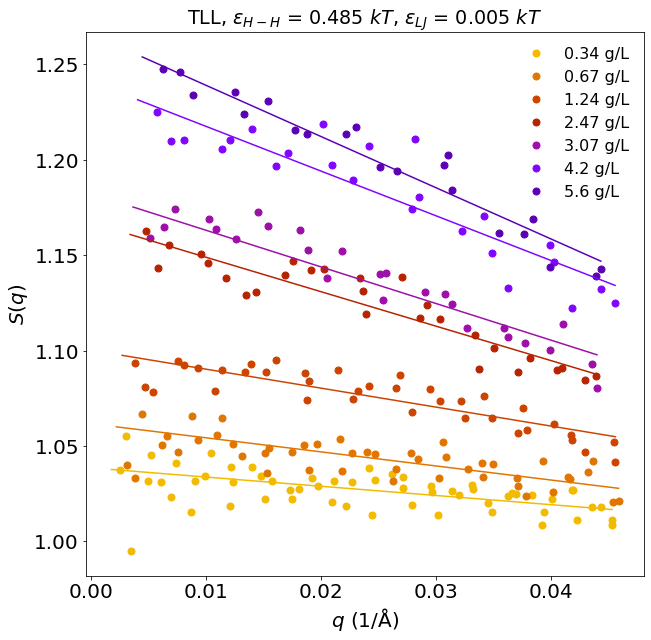

In [45]:
%cd -q $workdir
from scipy import stats
from cycler import cycler
plt.rcParams.update({'font.size': 16, 'figure.figsize': [10.0, 10.0]})
colormap = plt.cm.gnuplot_r
plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))


series = "series2"
structure = "open"


if series=="series1_T2":
    conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
    Mw = 31598.27
    if structure=="closed":
        macromolecule = "../s1_1du4_closed_t2.aam"
    elif structure=="open":
        macromolecule = "../s1_1ein_open_t2.aam"

if series=="series1_T3":
    conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
    Mw = 31598.27
    if structure=="closed":
        macromolecule = "../s1_1du4_closed_t3.aam"
    elif structure=="open":
        macromolecule = "../s1_1ein_open_t3.aam"

if series=="series1_R20":
    conc_range = [0.32, 0.7, 2.29, 3.8, 5.05, 6.44, 7.15, 7.85] 
    Mw = 31598.27
    if structure=="closed":
        macromolecule = "../1du4_R20.aam"

if series=="series2":
    conc_range = [0.34, 0.67, 1.24, 2.47, 3.07, 4.2, 5.6] #, 6.06] 
    Mw = 29609.61
    if structure=="closed":
        macromolecule = "../1du4_closed.aam"
    elif structure=="open":
        macromolecule = "../1ein_open.aam"    
        
l1 = [0.485]
l2 = [0.005]     


for epsHH_kT in l1: 
    for eps_kT in l2:
        for mod in [0]:
            conclist = []
            invs0list = []
            for Cp in conc_range:
                q_range = []
                s_range = []
                s_linreg = []
                pfx = str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)+'-dp'+str(mod)
                %cd -q $pfx
                q0,s0 = np.loadtxt("debye_n2.dat",usecols=(0,1), unpack=True, skiprows=1)
                for i in np.arange(0,len(q0)):
                    if q0[i] < 0.046 and q0[i] > 0.0:
                        q_range.append(q0[i])
                        s_range.append(s0[i])

                plt.plot(q_range, s_range, ms=7, marker='o',ls='None',label=str(Cp)+" g/L")

                %cd -q '..'

            plt.gca().set_prop_cycle(None)
            plt.gca().set_prop_cycle('color', plt.cm.gnuplot_r(np.linspace(0.1,1,8)))


for epsHH_kT in l1: 
    for eps_kT in l2:
        for mod in [0]:
            interceptlist = []
            conclist = []
            invs0list = []
            for Cp in conc_range:
                q_range = []
                s_range = []
                s_linreg = []
                pfx = str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-C'+str(Cp)+'-dp'+str(mod)
                %cd -q $pfx
                q0,s0 = np.loadtxt("debye_n2.dat",usecols=(0,1),unpack=True)
                for i in np.arange(0,len(q0)):
                    if q0[i] < 0.046 and q0[i] > 0.0:      #0.03-0.046 Guinier region (plutot 0.03-0.07?) 0.03
                        q_range.append(q0[i])
                        s_range.append(s0[i])

                slope, intercept, r_value, p_value, std_err = stats.linregress(q_range,s_range)
                interceptlist.append(intercept)
                invs0list.append(1/intercept)
                conclist.append(Cp)
                print(Cp, "r2=", r_value**2)
                for j in np.arange(0,len(q_range)):
                    s_linreg.append(q_range[j]*float(slope)+float(intercept))

                plt.plot(q_range, s_linreg,ls='-',marker='None', lw=1.5)
                plt.xlabel("$q$ (1/Å)", size=20)
                plt.ylabel("$S(q)$", size=20)
                plt.tick_params(axis='both', which='major', labelsize=20)
                #plt.title("TLL,"+str(structure)+", "+r"$\varepsilon_{LJ} = 0.05 kT$"+", "+r"$\varepsilon_{H-H} = 0.61 kT$",size=20,y=1.02)
                #plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1,0.5),fontsize=20)
                plt.legend(frameon=False)
                plt.title(str(title)+", "+r"$\varepsilon_{H-H}$ = "+str(epsHH_kT)+" $kT$, "+r"$\varepsilon_{LJ}$ = "+str(eps_kT)+" $kT$")

                %cd -q '..'

        np.savetxt(str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-dp'+str(mod)+'_intercepts.dat',np.transpose((conclist,invs0list)))
        #plt.savefig('reg-'+str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-dp'+str(mod)+'.pdf', bbox_inches='tight') 

%cd -q $workdir

inferior to 1? -0.033527469661814246
slope = -0.033527469661814246
A2 = -5.661585826664763e-07
B2 raw = -8.242378027742619e-22
B2 HS = 3.5998382595162327e-22
-----------------------------------
B2 norm. = -2.289652321449097
B2 exp.2 is : -5.437854310958658


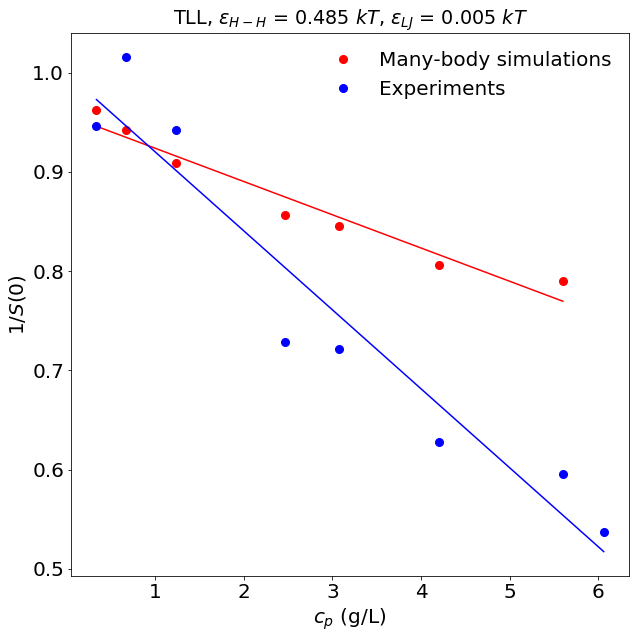

In [54]:
from scipy import stats

%cd -q $workdir


series = "series2"
structure = "open"
epsHH_kT = 0.485
eps_kT = 0.005
mod = 0


if series=="series1_R20":
    Mw = 31598.27
    expe = -4.034
    expdata = "s0_exp_series1.dat"
elif series=="series2":
    Mw = 29609.61
    expe = -5.42
    expdata = "s0_exp_series2.dat"

    
cnctr,intrc = np.loadtxt(str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'-dp'+str(mod)+'_intercepts.dat', usecols=(0,1),unpack=True)
conc_s0, invs0_exp, s0_exp = np.loadtxt(expdata, usecols=(0,1,2),unpack=True)

slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(cnctr,intrc)
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(conc_s0,invs0_exp)

plt.plot(cnctr,intrc,'ro', ms=8,label="Many-body simulations")
plt.plot(cnctr,cnctr*slope1+intercept1,'r-',lw=1.5)
#plt.title("TLLm, open, "+r"$\varepsilon_{LJ} = 0.005 kT$"+", "+r"$\varepsilon_{H-H} = 0.485 kT$",size=20,y=1.02)
plt.plot(conc_s0,invs0_exp,'bo', ms=8,label="Experiments")
plt.plot(conc_s0,conc_s0*slope2+intercept2,'b-',lw=1.5)

plt.xlabel("$c_p$ (g/L)", size=20)
plt.ylabel("$1/S(0)$", size=20)
plt.legend(frameon=False, fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title(str(title)+", "+r"$\varepsilon_{H-H}$ = "+str(epsHH_kT)+" $kT$, "+r"$\varepsilon_{LJ}$ = "+str(eps_kT)+" $kT$")

N_A = 6.02214129*1e+23

A2 = slope1/(2*Mw)
B2_raw = A2 * Mw**2 / N_A
B2_HS = 2 * math.pi * (27.8*(10**-9)*2)**3 / 3
B2_norm = B2_raw / B2_HS

A2_exp = slope2/(2*Mw)
B2_raw_exp = A2_exp * Mw**2 / N_A
B2_HS_exp = 2 * math.pi * (27.8*(10**-9)*2)**3 / 3
B2_norm_exp = B2_raw_exp / B2_HS_exp

print("inferior to 1?", 2*Mw*A2)
print("slope =", slope1)
print("A2 =", A2)
print("B2 raw =", B2_raw)
print("B2 HS =", B2_HS)
print("-----------------------------------")
print("B2 norm. =", B2_norm)

#print("B2 exp. is :", expe)
print("B2 exp.2 is :", B2_norm_exp)


#plt.savefig('b2fromsq-'+str(series)+'-'+str(structure)+'-h'+str(epsHH_kT)+'-e'+str(eps_kT)+'.pdf', bbox_inches='tight')

%cd -q $workdir

## Get stuff out of the output files

In [ ]:
num = "Excess pressure"
fileHandle = open ("tll.out","r" )                          # Read the output file
lineList = fileHandle.readlines()
fileHandle.close()
linenr = sum(1 for _ in lineList)                       # Number of lines in the file
for i in np.arange(0,linenr-1,1):                       # Loops through the file
    if str(num) in lineList[i]:                         # If text "Averages" is on a line...
        q = lineList[i]                                 # Keep this line...
        lineparts = q.split()                           # And cut it in columns...
        excpress = lineparts[5]                         # And take column 5 (excess pressure)